In [2]:
import numpy as np
import torch

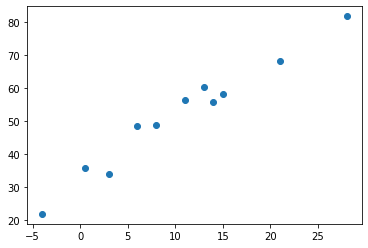

In [4]:
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

plt.scatter(t_c, t_u)

def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs=(t_p - t_c)**2
    return squared_diffs.mean()

w = torch.ones(())
b = torch.zeros(())

In [5]:
params=torch.tensor([1.0,0.0], requires_grad=True)

In [6]:
params

tensor([1., 0.], requires_grad=True)

In [7]:
t_p=model(t_u, *params)

In [8]:
t_p


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000], grad_fn=<AddBackward0>)

In [9]:
loss=loss_fn(t_p, t_c)

In [10]:
loss


tensor(1763.8848, grad_fn=<MeanBackward0>)

In [11]:
loss.backward()

In [12]:
loss

tensor(1763.8848, grad_fn=<MeanBackward0>)

In [13]:
params.grad

tensor([4517.2969,   82.6000])

In [15]:
params.grad.zero_()

tensor([0., 0.])

In [16]:
params

tensor([1., 0.], requires_grad=True)

In [17]:
params.grad

tensor([0., 0.])

In [38]:
def training_loop(epochs, le, params, t_u, t_c):
    for epoch in range(epochs):
        if params.grad != None:
            params.grad.zero_()
        t_p=model(t_u, *params)
        loss=loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= params.grad*le
            
        if epoch%1000==0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [30]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [39]:
t_un=t_u*0.1

In [40]:
training_loop(50000, 0.01, torch.tensor([1.0,0.0], requires_grad=True), t_un, t_c)

Epoch 0, Loss 80.364342
Epoch 1000, Loss 3.825483
Epoch 2000, Loss 2.957596
Epoch 3000, Loss 2.928646
Epoch 4000, Loss 2.927679
Epoch 5000, Loss 2.927648
Epoch 6000, Loss 2.927647
Epoch 7000, Loss 2.927645
Epoch 8000, Loss 2.927645
Epoch 9000, Loss 2.927645
Epoch 10000, Loss 2.927645
Epoch 11000, Loss 2.927645
Epoch 12000, Loss 2.927645
Epoch 13000, Loss 2.927645
Epoch 14000, Loss 2.927645
Epoch 15000, Loss 2.927645
Epoch 16000, Loss 2.927645
Epoch 17000, Loss 2.927645
Epoch 18000, Loss 2.927645
Epoch 19000, Loss 2.927645
Epoch 20000, Loss 2.927645
Epoch 21000, Loss 2.927645
Epoch 22000, Loss 2.927645
Epoch 23000, Loss 2.927645
Epoch 24000, Loss 2.927645
Epoch 25000, Loss 2.927645
Epoch 26000, Loss 2.927645
Epoch 27000, Loss 2.927645
Epoch 28000, Loss 2.927645
Epoch 29000, Loss 2.927645
Epoch 30000, Loss 2.927645
Epoch 31000, Loss 2.927645
Epoch 32000, Loss 2.927645
Epoch 33000, Loss 2.927645
Epoch 34000, Loss 2.927645
Epoch 35000, Loss 2.927645
Epoch 36000, Loss 2.927645
Epoch 37000, 

tensor([  5.3676, -17.3042], requires_grad=True)

In [41]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [84]:
le=0.0001

In [86]:
optimizer=optim.SGD([params], lr=le)

In [85]:
params=torch.tensor([1.0,0.0], requires_grad=True)

In [57]:
t_p=model(t_u, *params)
loss=loss_fn(t_p, t_c)
loss.backward()

In [58]:
params

tensor([-3.5173, -0.0826], requires_grad=True)

In [59]:
optimizer.step()

In [60]:
params

tensor([14.0256,  0.2204], requires_grad=True)

In [87]:
for x in range(100000):
    optimizer.zero_grad()
    t_p=model(t_u, *params)
    loss=loss_fn(t_p, t_c)
    loss.backward()
    optimizer.step()
    if x%10000==0:
        print(params, loss)

tensor([ 0.5483, -0.0083], requires_grad=True) tensor(1763.8848, grad_fn=<MeanBackward0>)
tensor([ 0.2811, -2.7914], requires_grad=True) tensor(21.3763, grad_fn=<MeanBackward0>)
tensor([ 0.3222, -5.1227], requires_grad=True) tensor(15.9254, grad_fn=<MeanBackward0>)
tensor([ 0.3567, -7.0796], requires_grad=True) tensor(12.0850, grad_fn=<MeanBackward0>)
tensor([ 0.3856, -8.7221], requires_grad=True) tensor(9.3793, grad_fn=<MeanBackward0>)
tensor([  0.4099, -10.1008], requires_grad=True) tensor(7.4731, grad_fn=<MeanBackward0>)
tensor([  0.4303, -11.2580], requires_grad=True) tensor(6.1301, grad_fn=<MeanBackward0>)
tensor([  0.4474, -12.2293], requires_grad=True) tensor(5.1839, grad_fn=<MeanBackward0>)
tensor([  0.4617, -13.0446], requires_grad=True) tensor(4.5172, grad_fn=<MeanBackward0>)
tensor([  0.4738, -13.7289], requires_grad=True) tensor(4.0476, grad_fn=<MeanBackward0>)


In [102]:
def training_loop(epochs, optimizer, params, tu, tc):
    for epoch in range(epochs):
        tp=model(tu, *params)
        loss=loss_fn(tp,tc)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #if epoch % 10000==0:
            #print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params, loss

In [97]:
params=torch.tensor([1.0,0.0], requires_grad=True)
opt=optim.Adam([params], 0.0001)

In [98]:
tu=t_u
tc=t_c
training_loop(100000, opt, params, tu, tc)

Epoch 0, Loss 1763.884766
Epoch 1000, Loss 1346.007935
Epoch 2000, Loss 1003.108826
Epoch 3000, Loss 723.590576
Epoch 4000, Loss 499.759247
Epoch 5000, Loss 326.218567
Epoch 6000, Loss 198.478989
Epoch 7000, Loss 111.823143
Epoch 8000, Loss 60.302658
Epoch 9000, Loss 35.834106
Epoch 10000, Loss 28.045321
Epoch 11000, Loss 26.782225
Epoch 12000, Loss 26.596064
Epoch 13000, Loss 26.406122
Epoch 14000, Loss 26.171558
Epoch 15000, Loss 25.910223
Epoch 16000, Loss 25.637245
Epoch 17000, Loss 25.360655
Epoch 18000, Loss 25.083834
Epoch 19000, Loss 24.808100
Epoch 20000, Loss 24.533850
Epoch 21000, Loss 24.261189
Epoch 22000, Loss 23.990257
Epoch 23000, Loss 23.721056
Epoch 24000, Loss 23.453590
Epoch 25000, Loss 23.187853
Epoch 26000, Loss 22.923851
Epoch 27000, Loss 22.661573
Epoch 28000, Loss 22.401033
Epoch 29000, Loss 22.142225
Epoch 30000, Loss 21.885149
Epoch 31000, Loss 21.629801
Epoch 32000, Loss 21.376181
Epoch 33000, Loss 21.124298
Epoch 34000, Loss 20.874144
Epoch 35000, Loss 20.6

tensor([ 0.3999, -9.5367], requires_grad=True)

In [113]:
for opt in dir(optim)[9:]:
    params=torch.tensor([1.0,0.0], requires_grad=True)
    print("optim."+str(opt)+"([params], 0.01)")
    optimizer=eval("optim."+str(opt)+"([params], 0.01)")
    tu=t_u*0.1
    tc=t_c
    print("--------------"+str(opt)+"--------------")
    print(training_loop(100000, optimizer, params, tu, tc))

optim.RAdam([params], 0.01)
--------------RAdam--------------
(tensor([  5.3677, -17.3048], requires_grad=True), tensor(2.9276, grad_fn=<MeanBackward0>))
optim.RMSprop([params], 0.01)
--------------RMSprop--------------
(tensor([  5.3627, -17.3098], requires_grad=True), tensor(2.9287, grad_fn=<MeanBackward0>))
optim.Rprop([params], 0.01)
--------------Rprop--------------
(tensor([  5.3677, -17.3047], requires_grad=True), tensor(2.9276, grad_fn=<MeanBackward0>))
optim.SGD([params], 0.01)
--------------SGD--------------
(tensor([  5.3676, -17.3042], requires_grad=True), tensor(2.9276, grad_fn=<MeanBackward0>))
optim.SparseAdam([params], 0.01)
--------------SparseAdam--------------


RuntimeError: SparseAdam does not support dense gradients, please consider Adam instead

In [114]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 3,  1,  6,  9,  0,  5,  2, 10,  8,  4,  7])

In [115]:
train_indices=shuffled_indices[:-n_val]

In [116]:
val_indices=shuffled_indices[-n_val:]

In [117]:
train_indices, val_indices

(tensor([ 3,  1,  6,  9,  0,  5,  2, 10,  8]), tensor([4, 7]))

In [118]:
train_tu=tu[train_indices]
train_tc=tc[train_indices]

val_tu=tu[val_indices]
val_tc=tc[val_indices]

In [119]:
val_tu*=0.1
train_tu*=0.1

In [120]:
def training_loop(epochs, optimizer, params, train_tu, val_tu, train_tc, val_tc):
    for epoch in range(epochs):
        train_tp=model(train_tu, *params)
        train_loss=loss_fn(train_tp, train_tc)
        
        val_tp=model(val_tu, *params)
        val_loss=loss_fn(val_tp, val_tc)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 1000==0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [123]:
params=torch.tensor([1.0,0.0], requires_grad=True)
le=0.1
opt=optim.SGD([params], le)

training_loop(10000, opt, params, train_tu, val_tu, train_tc, val_tc)

Epoch 0, Training loss 198.6322, Validation loss 63.3613
Epoch 1000, Training loss 2.7935, Validation loss 3.6385
Epoch 2000, Training loss 2.6958, Validation loss 5.2070
Epoch 3000, Training loss 2.6956, Validation loss 5.2858
Epoch 4000, Training loss 2.6956, Validation loss 5.2889
Epoch 5000, Training loss 2.6956, Validation loss 5.2889
Epoch 6000, Training loss 2.6956, Validation loss 5.2889
Epoch 7000, Training loss 2.6956, Validation loss 5.2889
Epoch 8000, Training loss 2.6956, Validation loss 5.2889
Epoch 9000, Training loss 2.6956, Validation loss 5.2889


tensor([ 56.7098, -18.9269], requires_grad=True)